# Music Genre Prediction using Logistic Regression

#### Loading and Displaying data

In [17]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("train.csv", sep = r',', skipinitialspace = True)
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


#### Cleaning data

In [19]:
# Dropping rows with NaN
df = df.dropna()

# Dropping columns not needed for features
del df["Track Name"]
del df["Artist Name"]

df.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2


In [20]:
df.shape

(11813, 15)

#### Defining X and y and Splitting data

In [21]:
from sklearn.model_selection import train_test_split

# Columns used as predictors
Xdf = df.drop(["Class"], axis = 1)
X = Xdf.values

# Extracting output values
y = df["Class"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)


#### Scaling data

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtr1 = scaler.fit_transform(X_train)
Xts1 = scaler.transform(X_test)

#### Cross fold validation with regularization

In [ ]:
import sklearn.model_selection
from sklearn.linear_model import LogisticRegression

In [ ]:
nfold = 10

kf = sklearn.model_selection.KFold(n_splits=nfold, shuffle=True)
ptest = [0.0001, 0.001, 0.01, 0.1, 1.0]

crossval_matrix = np.zeros((len(ptest),nfold))

#Kfold cross validation
for isplit, Ind in enumerate(kf.split(X)):
  Itr, Its = Ind

  xtr = X[Itr]
  ytr = y[Itr]
  xts = X[Its]
  yts = y[Its]

  scaler = StandardScaler()
  xtr1 = scaler.fit_transform(xtr)
  xts1 = scaler.transform(xts)

  # Loop over the penalty
  for it, p in enumerate(ptest):
  
      # Fit data on training data
      model = LogisticRegression(solver='lbfgs', penalty='l2', C =p, multi_class="multinomial", max_iter=1000)
      model.fit(xtr1,ytr)
      acc = model.score(xts1,yts)
      
      # Measure acc on test data
      crossval_matrix[it,isplit] = acc

crossval_avg = np.mean(crossval_matrix, axis=1)

The highest accuracy is 0.48226430611013926


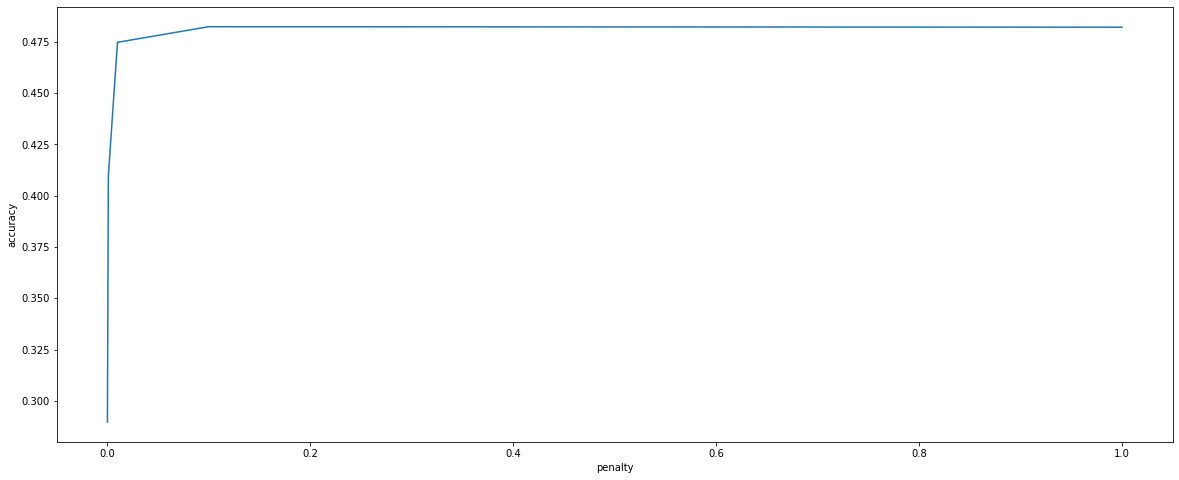

In [ ]:
# Plot of accuracy against penalty
plt.figure(figsize=(20,8))
plt.plot(ptest, crossval_avg)
plt.xlabel('penalty')
plt.ylabel('accuracy')
print(f"The highest accuracy is {np.max(crossval_avg)}")

#### Testing number of features

In [ ]:
from sklearn.feature_selection import RFE

#select the top features 
logreg = LogisticRegression(solver='lbfgs', penalty='l2', C =1.0, multi_class="multinomial", max_iter=1000).fit(Xtr1, y_train)
rfe = RFE(logreg, n_features_to_select=1)
rfe.fit(Xtr1, y_train)


RFE(estimator=LogisticRegression(max_iter=1000, multi_class='multinomial'),
    n_features_to_select=1)

In [ ]:
from operator import itemgetter
features = Xdf.columns.to_list()
print("Features importance in descending order")

for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

Features importance in descending order
1 duration_in min/ms
2 energy
3 speechiness
4 acousticness
5 instrumentalness
6 danceability
7 valence
8 Popularity
9 loudness
10 mode
11 liveness
12 tempo
13 key
14 time_signature


In [ ]:
# Accuracy with respect to number of features
n_features = 14

acc_features = np.zeros(n_features)

for n_f in range(n_features):
  logreg = LogisticRegression(solver='lbfgs', penalty='l2', C =1.0, multi_class="multinomial", max_iter=1000).fit(Xtr1, y_train)
  rfe = RFE(logreg, n_features_to_select=n_f+1)
  rfe.fit(Xtr1, y_train)
  acc_features[n_f] = rfe.score(Xts1, y_test)

In [ ]:
x = np.linspace(1,15,num=14)
plt.plot(x,acc_features)
plt.ylabel('accuracy')
plt.xlabel('number of features')

# Prediction using a Neural Network

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from keras.layers import Dropout

import tensorflow.keras.backend as K
nin = X_train.shape[1]
nout = np.max(y_train) + 1
hist_arr = []
accuracies = []
scores = []


#Testing for best number of hidden units. Note that the range is small here,
#but during testing multiple sessions were ran, all testing different ranges (done to save time).
#The most optimal nh was found to be 26.


# for i in range(13, 18, 1):
#   K.clear_session()
#   print(i)
#   nh = i
#   model = Sequential()
#   model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid',name='hidden'))
#   model.add(Dense(units=nout, activation='softmax', name='output'))

#   opt = optimizers.Adam(learning_rate=1e-3) 
#   model.compile(optimizer=opt,
#                 loss='sparse_categorical_crossentropy',
#                 metrics=['accuracy'])

#   hist = model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=False)
#   hist_arr.append(hist)
#   score, acc = model.evaluate(X_test, y_test, verbose=1)
#   accuracies.append(acc)
#   scores.append(score)


#Different hidden layers were tested, and it was found that the following layers were most effective.
#Note that a single dropout layer was the best case, and the highest accuracy achieved was approximately 55%

#What we learned in class was applied for each of the parameters, and further research was conducted to gain insight
#as to what the best combinations of layers would be.

K.clear_session()
nh = 34
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid',name='hidden'))
# model.add(Dropout(0.6))
model.add(Dense(units=nout, activation='softmax', name='output'))

opt = optimizers.Adam(learning_rate=1e-3) 
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(Xtr1, y_train, epochs=1000, batch_size=100, verbose=False)
hist_arr.append(hist)
score, acc = model.evaluate(Xts1, y_test, verbose=1)

# accuracies.append(acc)
# scores.append(score)

# Music Genre Prediction using SVM

In this section, we use SVMs to instead classify music genres

## Importing libraries

In [ ]:
from sklearn import svm

## Finding Optimal Conditions for SVC

For our SVC, we will train and test the model across different c and gamma values to find the optimal hyperparameters.

The chosen parameters for c are: 0.001, 0.01, 0.1, 1 and 10, and a linear kernel is used. 

The chosen parameters for gamma are: 0.001, 0.01, 0.1, and 1.

In [ ]:
c_values = np.array([0.001, 0.01,0.1,1,10])
gamma_values = np.array([0.001, 0.01, 0.1, 1])
# kernel_values = np.array(["linear", "poly", "rbf", "sigmoid"])

In [ ]:
acc_matrix = np.zeros((c_values.shape[0],gamma_values.shape[0]))

for i_c, c in enumerate(c_values):
  for i_g, g in enumerate(gamma_values):
    print(i_c, i_g)
    svc = svm.SVC(probability=False,  kernel="linear", C=c, gamma=g,verbose=10) #linear
    svc.fit(X_train,y_train)
    yhat = svc.predict(X_test)
    acc = np.mean(yhat == y_test)
    # print(acc)
    acc_matrix[i_c, i_g] = acc

Next, we fill find the values of c and gamma with the highest accuracy

---



In [ ]:
max_index = np.argmax(acc_matrix)
max_i = max_index//gamma_values.shape[0]
max_j = max_index - (max_i)*gamma_values.shape[0]
c = c_values.flatten()[max_i]
gamma = gamma_values.flatten()[max_j]
max_acc = acc_matrix.flatten()[max_index]

print("-- SVC with highest accuracy --")
print(f"Accuracy = {max_acc}")
print(f"c = {c} and gamma = {gamma}")

## With PCA Data

Using the above optimal conditions, we will observe how the model gets more accurate as the number of Principle Components (PCs) increase:

In [ ]:
acc_matrix_pca = np.zeros(X_train.shape[1])

for i_c in range(X_train.shape[1]):
    pcal = PCA(n_components = i_c + 1)
    X_pca_train = pcal.fit_transform(X_train)
    X_pca_test = pcal.transform(X_test)
    svc = svm.SVC(probability=False,  kernel="linear", C=c, gamma=g,verbose=10) #linear
    svc.fit(X_pca_train,y_train)
    yhat = svc.predict(X_pca_test)
    acc = np.mean(yhat == y_test)
    acc_matrix_pca[i_c] = acc

Plot the relationship of accuracy against number of PCs

In [ ]:
plt.plot(np.arange(acc_matrix_pca.shape[0])+1, acc_matrix_pca,  'r')
plt.xlabel('# of PCs')
plt.ylabel('accuracy')

Let us find the highest performing number of PCs.

In [ ]:
max_pca_index = np.argmax(acc_matrix_pca)
max_pca_acc = acc_matrix_pca[max_pca_index]

print("-- SVC with highest accuracy --")
print(f"Accuracy = {max_pca_acc}")
print(f"c = {c} and gamma = {gamma}")
print(f"Number of PCs = {max_pca_index + 1}")

By the above results, contrary to expectations, we see that having 13 PCs has had a slightly better results than using all 14 PCs. This can be misleading since the difference in accuracy is miniscule. However, this may also indicate that there exists an input feature that is harming the performance of the system.